In [45]:
#VSE SKUPAJ-----CV verzija 29.12.2021---------------IMAGES--------------------basic kNN with euclidean metric-----------------------------
#1) load data IMAGES	2) define PM	4) lmnn	4) knn	5) CV


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score   #for crossvalidation
from sklearn.model_selection import StratifiedKFold

from pylmnn import LargeMarginNearestNeighbor as LMNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score    #for confusion matrix
from sklearn import datasets, neighbors, metrics   # Import datasets, classifiers and performance metrics

from sklearn.preprocessing import Normalizer	#for normalization

from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import StandardScaler    ##for standardization-Gaussian with zero mean and unit variance.

#BMB
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline

In [46]:
df = pd.read_csv('japanPhog.csv', header=None)
df.iloc[:,630].unique() # BMB: Alenka, is this the number of classes
df.count(axis=0, level=None, numeric_only=False)

0      212
1      212
2      212
3      212
4      212
      ... 
626    212
627    212
628    212
629    212
630    212
Length: 631, dtype: int64

In [47]:
# X: the data to fit. Can be for example a list, or an array. y: the target variable to try to predict in the case of supervised learning.
#for iris dataset: X, y = datasets.load_iris(return_X_y=True)  	
#X, y = datasets.load_digits(return_X_y=True)
#print(datasets.load_digits(return_X_y=True))
#X,y = datasets.load_digits(return_X_y=True)
#X, y = datasets.load_iris(return_X_y=True)		#X--data, y--class

train_df = pd.read_csv('japanPhog.csv', header=None)
X = np.array(train_df.iloc[:, :-1])	#all rows & all column except last one
#print(train_data)
y = np.array(train_df.iloc[:, -1])   #all rows & only last column

#BMB define train and test splits
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=52)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=52)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9) # create a validation set from the already splited training set

X.shape
print(f"Mn X {X.shape}")

# BMB
X_train.shape
X_test.shape 
y_train.shape 
y_test.shape

print(f"Mn X_train {X_train.shape}")
print(f"Mn X_test {X_test.shape}")
print(f"Mn y_train {y_train.shape}")
print(f"Mn y_test {y_test.shape}")
print(f"Mn X_valid {X_valid.shape}")
print(f"Mn y_valid {y_valid.shape}")

Mn X (212, 630)
Mn X_train (114, 630)
Mn X_test (85, 630)
Mn y_train (114,)
Mn y_test (85,)
Mn X_valid (13, 630)
Mn y_valid (13,)


In [48]:
#BMB Normalisation for each subset separatly

transformer = Normalizer().fit(X_train)
X_train = transformer.transform(X_train)

transformer = Normalizer().fit(X_test)
X_test = transformer.transform(X_test)

transformer = Normalizer().fit(X_valid)
X_valid = transformer.transform(X_valid)

In [49]:
##BMB

#Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated = standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)


scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)


scaler = StandardScaler()
scaler.fit(X_valid)
X_valid = scaler.transform(X_valid)

# LMNN: algorithm for metric learning---------------------after cross validation

### BMB Hyperparameters should be set on a different dataset, for example a cross-validation dataset
# Set up the hyperparameters
k_train, k_test, max_iter = 3, 3, 2000	#n_components=X.shape[1], za bpp:640

# Instantiate the metric learner
lmnn = LMNN(n_neighbors=k_train, max_iter=max_iter)

# Train the metric learner
lmnn.fit(X_valid,y_valid)

LargeMarginNearestNeighbor(callback=None, impostor_store='auto', init='pca',
                           max_impostors=500000, max_iter=2000,
                           n_components=None, n_jobs=1, n_neighbors=3,
                           neighbors_params=None, random_state=None,
                           store_opt_result=False, tol=1e-05, verbose=0,
                           warm_start=False, weight_push_loss=0.5)

In [50]:
# Create a classifier: a knn with PM
acc1 = []
acc1_train = []
for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i, leaf_size=3, algorithm='auto', metric='euclidean', n_jobs=4).fit(X_train,y_train) 	#to add new metric: metric='pyfunc'
    #for testing
    #knn = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='euclidean')    #algorithm='ball_tree' - for a custom metric

    # Learn the digits/iris on the train subset - fit the model
    knn.fit(lmnn.transform(X_train),y_train)

    #cross validation-------------------where is this------------after knn
    # BMB really not sure what this line of code is doing here.
    #scores = cross_val_score(knn, X, y, cv=StratifiedKFold(10), n_jobs=4)	#rez. se ne spremeijo, če dam tuki lmnn.transform(X)
   



    # Predict the value of the digit on the test subset
    predicted = knn.predict(lmnn.transform(X_test))
    predicted_train= knn.predict(lmnn.transform(X_train))
    
    acc1.append(metrics.accuracy_score(y_test, predicted))
    acc1_train.append(metrics.accuracy_score(y_train, predicted_train))

    #for output in txt file
   # with open("outputjapanPhogEM.txt", "a") as f:
   #     print(f"Classification report for classifier {knn}:\n"
   #           f"{metrics.classification_report(y_test, predicted)}\n", file=f)   
   #     print('Name of data:', file=f)

        # Print out confusion matrix
   #     cmat = confusion_matrix(y_test, predicted)	#print(cmat)

   #     print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))), file=f) ## TUKAJ JE OCITNO NAPAKA
   #     print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))), file=f)

   #     print(cmat, file=f)

   #     print('Diagonal (sum): ', np.trace(cmat), file=f)
   #     print("All Instances:", np.sum(cmat), file=f)
   #     print("Correctly Classified Instances:", np.trace(cmat)/np.sum(cmat), file=f)
   #     print('Number of neighbors: ', i, file=f)


Maximum accuracy: 0.7764705882352941 at K = 2


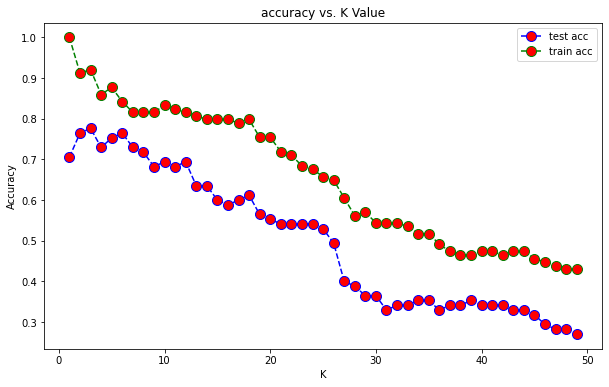

In [53]:
plt.figure(figsize=(10,6))
# Plot the accuracy on the test data
plt.plot(range(1,50),acc1,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label='test acc')
# Plot the accuracy on the training data
plt.plot(range(1,50),acc1_train,color = 'green',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label='train acc')

plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
print("Maximum accuracy:",max(acc1),"at K =",acc1.index(max(acc1)))

# Visualise accuracy vs K value
see https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

Maximum accuracy: 0.7764705882352941 at K = 2


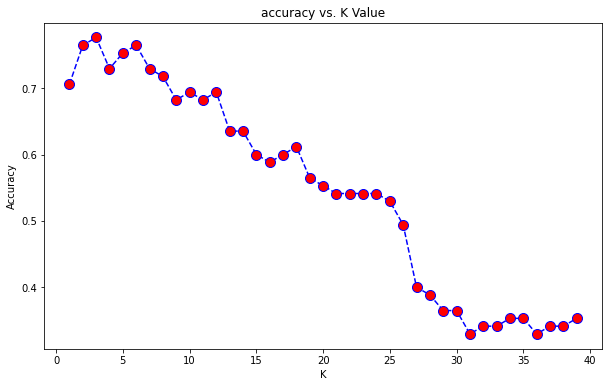

In [54]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    neigh.fit(lmnn.transform(X_train),y_train)
    yhat = neigh.predict(lmnn.transform(X_test))
    #yhat = neigh.predict(lmnn.transform(X_test))
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))

In [55]:
max(acc)

0.7764705882352941